In [1]:
from google.cloud import bigquery
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline


In [2]:
def read_bq(query_):
    from google.cloud import bigquery

    client = bigquery.Client()
    query_job = client.query(query_)
    return query_job.result().to_dataframe()


In [3]:
query = 'select * from `htz-common.aggregated_data.rfv`'
data = read_bq(query)
data.set_index('sso_id',inplace=True)

# Data Statistic

In [17]:
data.describe()

,mobile,desktop,app,amp,fb_instant,other,null_source,push_notification,app_share,smartfocus,...,news,weekend,culture,food,opinions,literature,captain,sport,other_secs,devices
count,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,...,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000,40485.000000
mean,109.680820,183.519600,466.077337,6.197900,8.962752,0.024182,374.446906,22.761393,2.271977,3.982636,...,501.438656,79.806249,239.827887,59.857676,115.124392,20.389650,32.127949,45.540620,246.973719,17.123157
std,291.006538,358.540027,649.401894,21.254027,34.812065,2.268091,390.604908,44.741953,5.526379,16.470306,...,584.341202,97.293716,292.301667,96.850679,182.292183,35.014472,43.466730,94.906512,320.797146,11.844583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,107.000000,0.000000,0.000000,0.000000,...,105.000000,16.000000,44.000000,6.000000,16.000000,2.000000,4.000000,3.000000,49.000000,9.000000
50%,13.000000,43.000000,223.000000,0.000000,0.000000,0.000000,275.000000,3.000000,0.000000,0.000000,...,315.000000,48.000000,144.000000,25.000000,57.000000,9.000000,17.000000,16.000000,143.000000,15.000000
75%,68.000000,219.000000,668.000000,5.000000,0.000000,0.000000,533.000000,26.000000,2.000000,0.000000,...,701.000000,109.000000,332.000000,73.000000,145.000000,25.000000,44.000000,48.000000,331.000000,23.000000
max,13591.000000,21792.000000,14822.000000,1449.000000,1121.000000,321.000000,27541.000000,1100.000000,264.000000,425.000000,...,18381.000000,2548.000000,10477.000000,2264.000000,5778.000000,1530.000000,891.000000,3147.000000,8970.000000,582.000000


## Number of Devices

In [161]:
data.devices.describe()

count    40485.000000
mean        17.123157
std         11.844583
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max        582.000000
Name: devices, dtype: float64

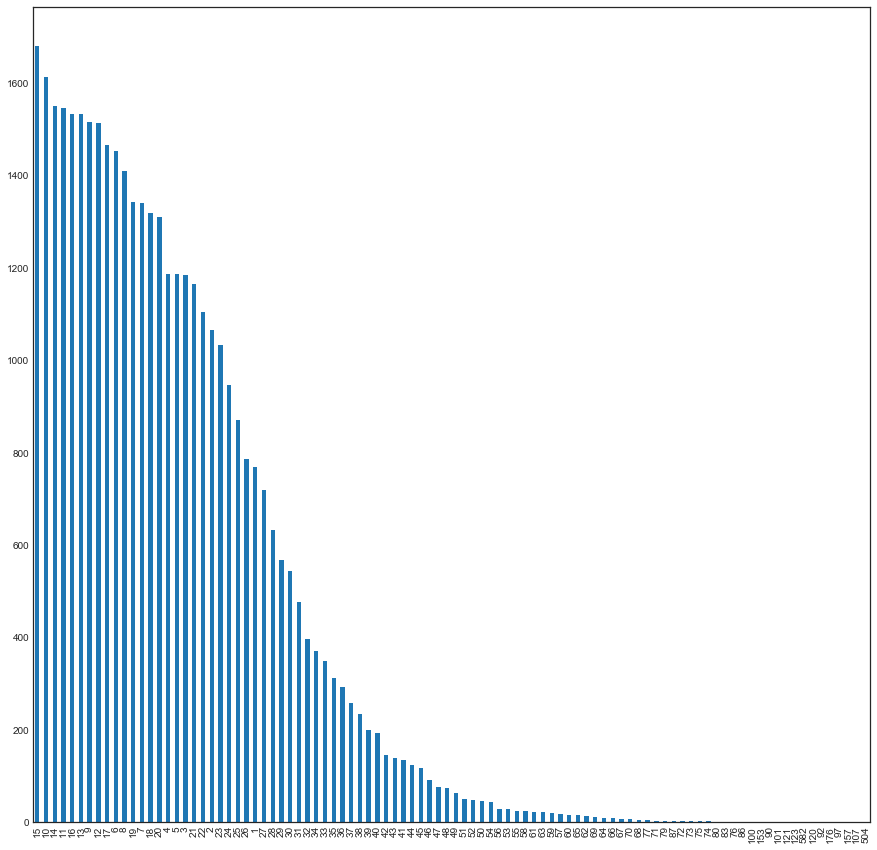

In [170]:
data.devices.value_counts().plot(kind='bar',figsize=(15,15))

In [18]:
df = data[data.devices<=15]

In [20]:
#data.set_index('sso_id',inplace=True)
df = df.fillna(0)
z = np.abs(zscore(df))
df = df[(z < 3).all(axis=1)].copy()


In [21]:
df.describe()

,mobile,desktop,app,amp,fb_instant,other,null_source,push_notification,app_share,smartfocus,...,news,weekend,culture,food,opinions,literature,captain,sport,other_secs,devices
count,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,...,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000,15855.000000
mean,36.051719,76.154084,192.584358,1.981205,1.744939,0.000694,174.073541,10.959950,0.667676,1.380952,...,205.350489,32.708231,97.406433,21.581520,43.713970,7.717629,12.193314,15.291706,93.333333,8.309555
std,97.962404,150.810024,277.389254,4.958872,7.879351,0.042763,179.684982,21.410463,1.535090,5.081157,...,249.818681,40.060844,123.005617,34.084611,64.766868,11.791599,17.513812,28.642223,115.360381,4.205779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,...,31.000000,4.000000,12.000000,1.000000,4.000000,0.000000,0.000000,0.000000,15.000000,5.000000
50%,3.000000,6.000000,61.000000,0.000000,0.000000,0.000000,112.000000,1.000000,0.000000,0.000000,...,110.000000,18.000000,49.000000,7.000000,18.000000,3.000000,5.000000,4.000000,49.000000,8.000000
75%,19.000000,73.000000,277.500000,1.000000,0.000000,0.000000,260.000000,11.000000,1.000000,0.000000,...,284.000000,46.000000,134.000000,26.000000,56.000000,10.000000,16.000000,17.000000,128.000000,12.000000
max,721.000000,981.000000,1669.000000,45.000000,75.000000,3.000000,969.000000,122.000000,10.000000,45.000000,...,1592.000000,251.000000,780.000000,230.000000,519.000000,93.000000,112.000000,241.000000,824.000000,15.000000


In [71]:
platform_columns = ['mobile', 'desktop', 'app', 'amp', 'fb_instant', 'other']
source_columns = ['null_source',
       'push_notification', 'app_share', 'smartfocus', 'facebook', 'outbrain',
       'web_share', 'dlvr_it', 'mivzakimnet']
secs_columns = ['news', 'weekend', 'culture', 'food', 'opinions',
       'literature', 'captain', 'sport', 'other_secs']

In [147]:
def draw_histograms(df, variables, n_rows, n_cols,color_='#86bf91',fig_s=(15,15)):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        x = df[var_name].hist(bins=5,ax=ax,grid=False, figsize=(15,15), color=color_, zorder=2, rwidth=0.9)
        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel(var_name, labelpad=20, weight='bold', size=12)

        # Set y-axis label
        ax.set_ylabel('Users', labelpad=20, weight='bold', size=12)
        #ax.set_ylabel('# of {}'.format(var_name), labelpad=20, weight='bold', size=12)


## Platforms Histograms

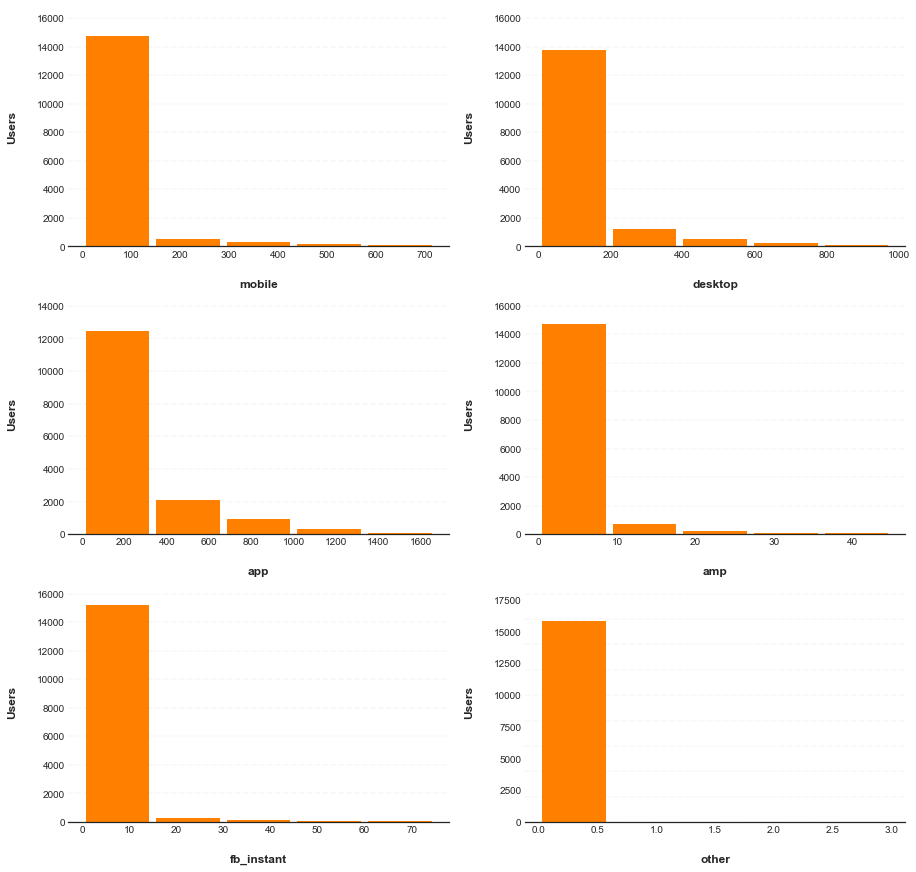

In [72]:
draw_histograms(df,platform_columns,3,2,color_='#ff8000')

## Sources Histograms

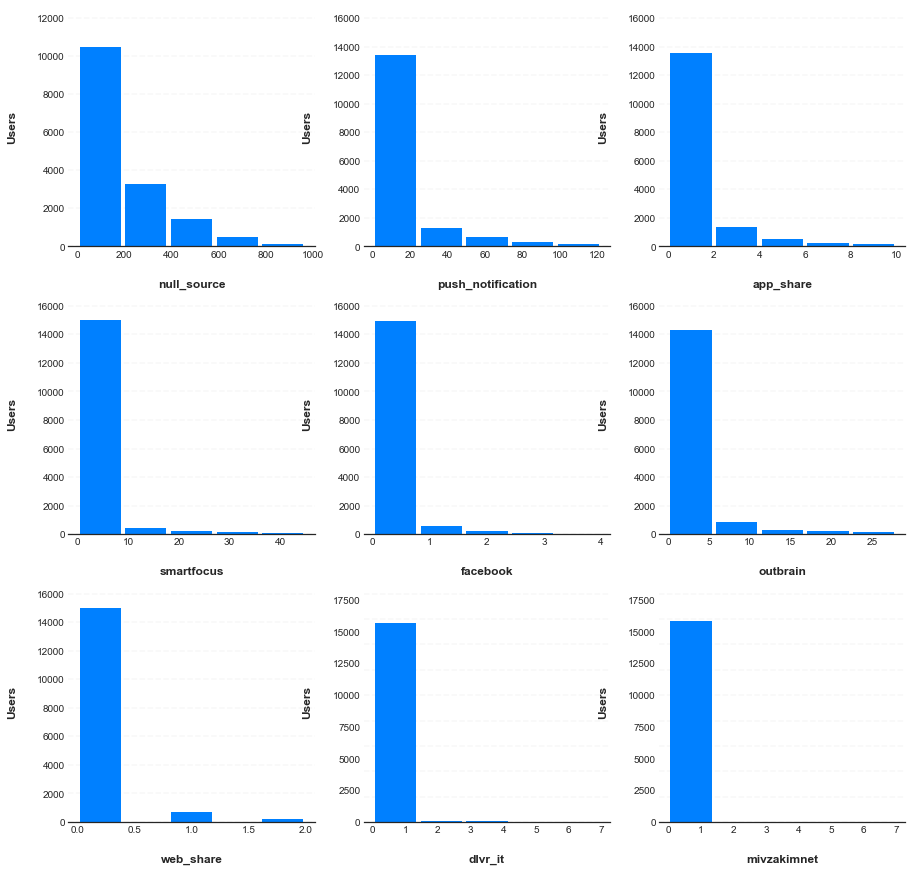

In [73]:
draw_histograms(df,source_columns,3,3,color_='#0080ff')

## Sections Histograms

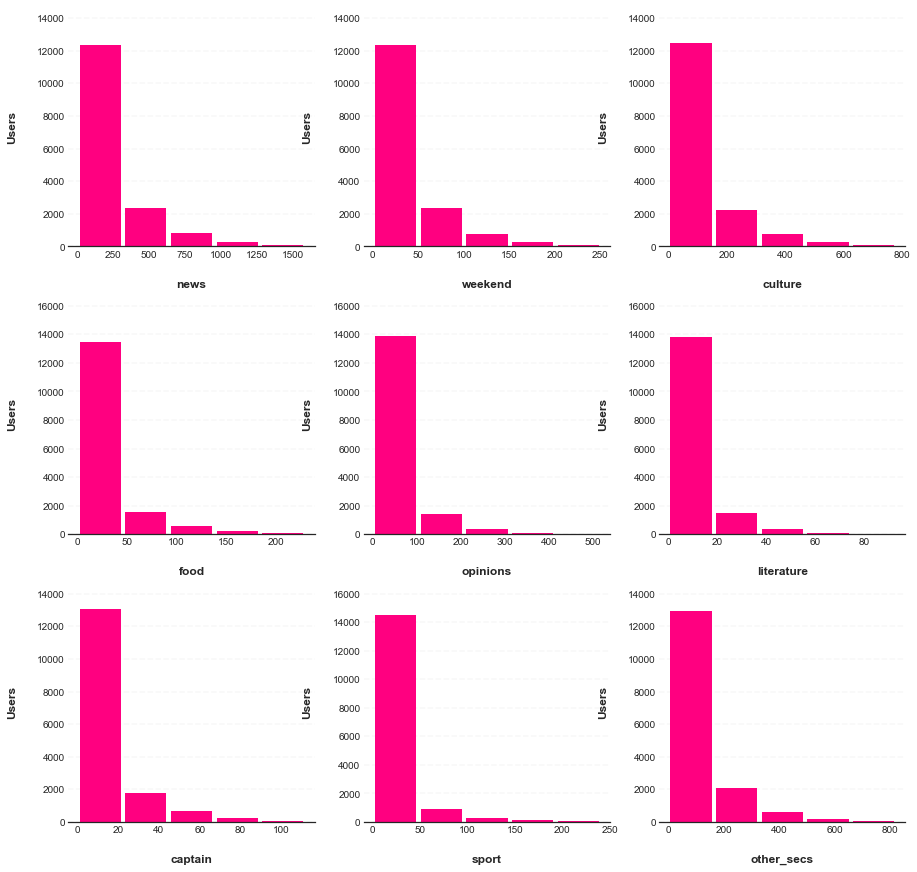

In [148]:
draw_histograms(df,secs_columns,3,3,color_='#ff0080')

## Define the higher Source except Null_source

In [79]:
df['source'] = df[source_columns].idxmax(axis=1)
source_df = df[df['source']!='null_source']

Text(0, 0.5, 'Users')

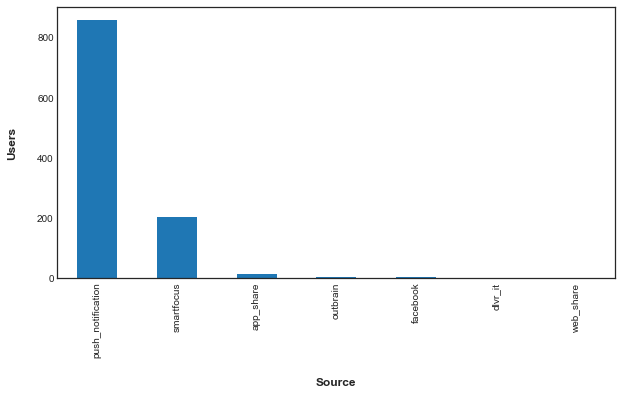

In [157]:
ax = source_df['source'].value_counts().plot(kind='bar',figsize=(10,5))
ax.set_xlabel("Source",labelpad=20, weight='bold', size=12)
ax.set_ylabel("Users",labelpad=20, weight='bold', size=12)

## Platform Comparison

Text(0, 0.5, 'Users')

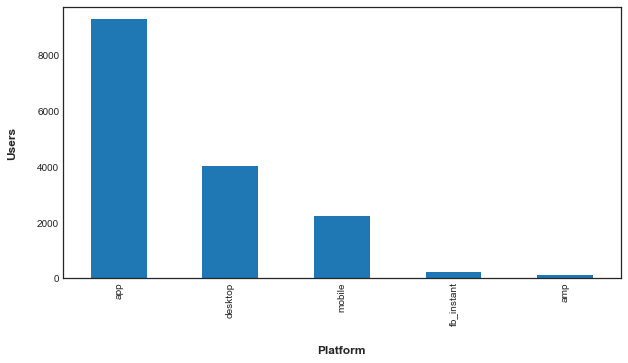

In [156]:
df['platform'] = df[platform_columns].idxmax(axis=1)
ax = df['platform'].value_counts().plot(kind='bar',figsize=(10,5))
ax.set_xlabel("Platform",labelpad=20, weight='bold', size=12)
ax.set_ylabel("Users",labelpad=20, weight='bold', size=12)

In [190]:
def inertia(df_):
    scores = [KMeans(n_clusters=i+2,n_jobs=-1).fit(df_).inertia_ for i in range(10)]
    sns.lineplot(np.arange(2, 12), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel("Inertia")
    plt.title("Inertia of k-Means versus number of clusters")

In [195]:
kmeans_columns = platform_columns +source_columns + secs_columns
print(kmeans_columns)

['mobile', 'desktop', 'app', 'amp', 'fb_instant', 'other', 'null_source', 'push_notification', 'app_share', 'smartfocus', 'facebook', 'outbrain', 'web_share', 'dlvr_it', 'mivzakimnet', 'news', 'weekend', 'culture', 'food', 'opinions', 'literature', 'captain', 'sport', 'other_secs']


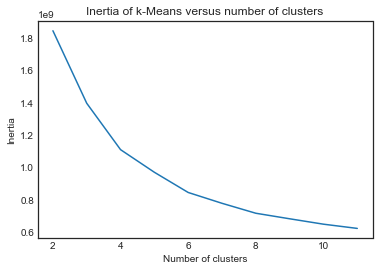

In [199]:
from silhouette_analysis import plot_silhouette
from sklearn.cluster import KMeans
inertia(df[kmeans_columns].fillna(0))



For n_clusters = 3 The average silhouette_score is : 0.4606847771105328
For n_clusters = 4 The average silhouette_score is : 0.49362523258228447
For n_clusters = 5 The average silhouette_score is : 0.4299916431242999
For n_clusters = 6 The average silhouette_score is : 0.4481019639150363
For n_clusters = 7 The average silhouette_score is : 0.38102792170984434


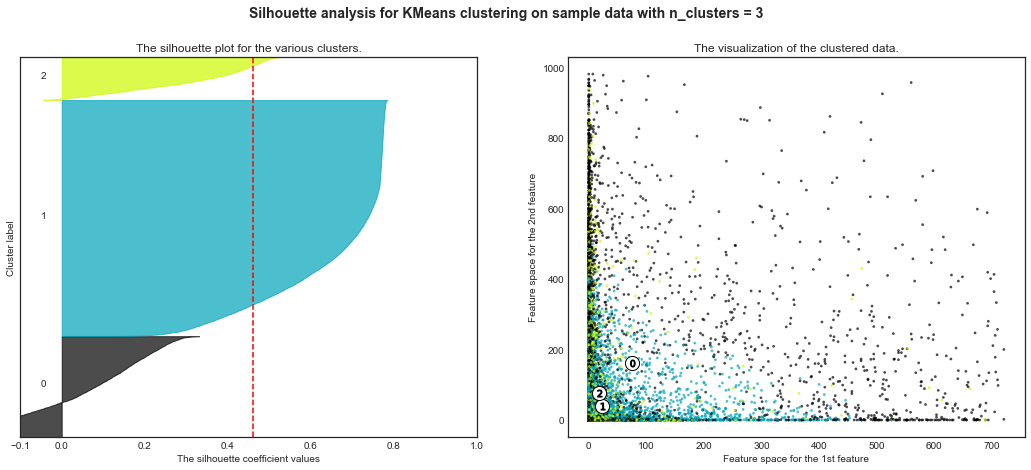

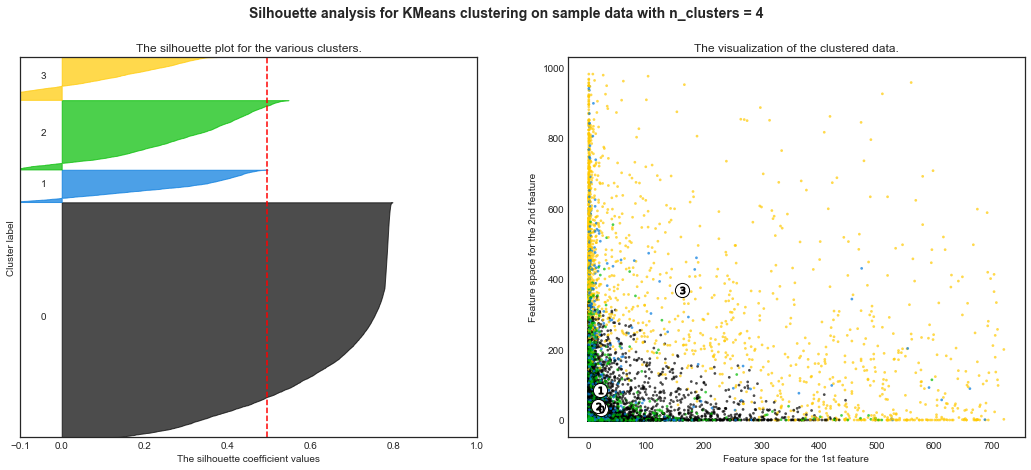

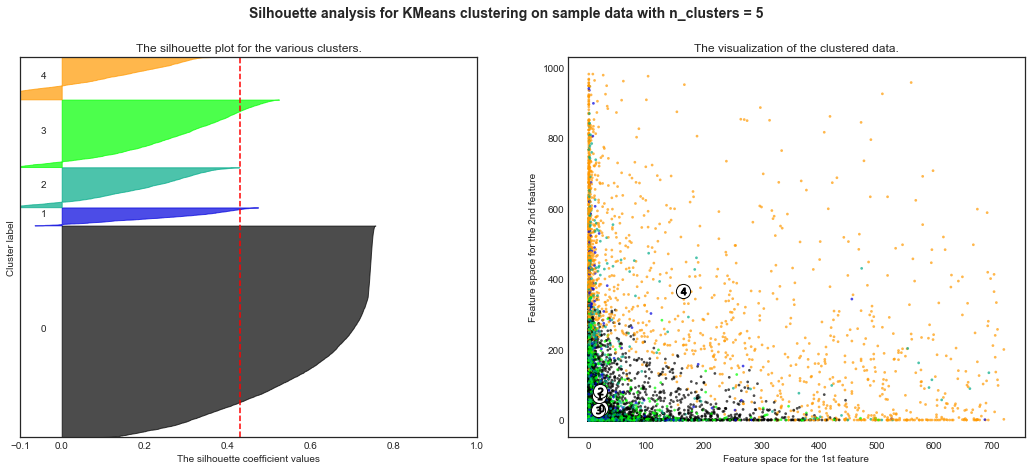

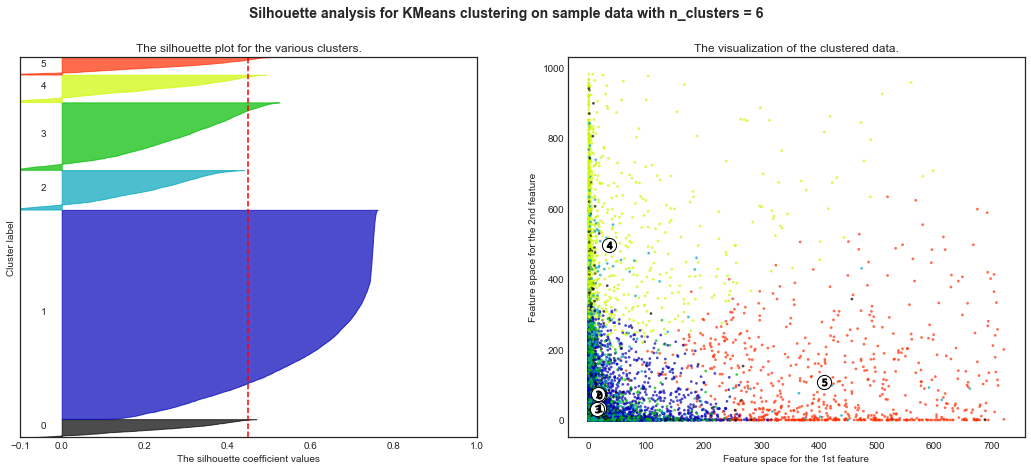

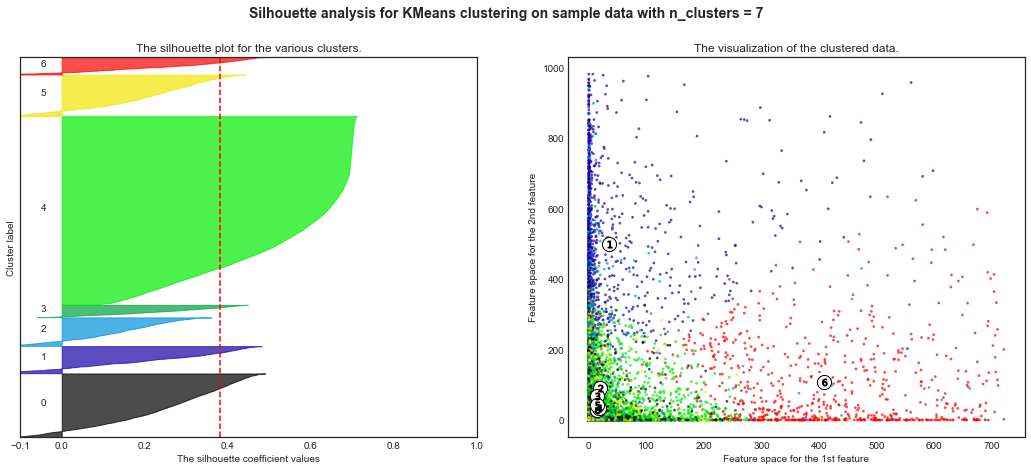

In [198]:
plot_silhouette(df[kmeans_columns].fillna(0).values)

In [201]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(df[kmeans_columns].values)


In [237]:
def plot_variance(df_):
    df_mean = df_.groupby('label').mean().reset_index()
    results = pd.DataFrame(columns=['Variable', 'Std'])
    for column in df_mean.columns[1:]:
        results.loc[len(results), :] = [column, np.std(df_mean[column])]
    selected_columns = list(results.sort_values('Std', ascending=False).head(8).Variable.values) + ['label']

    # Plot data
    tidy = df_[selected_columns].melt(id_vars='label')
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(x='label', y='value', hue='variable', data=tidy, palette='Set3')
    plt.legend(loc='upper right')

In [240]:
def plot_clusters(labels):
    import itertools
    import matplotlib.patches as mpatches

    red_patch = mpatches.Patch(color='red', label='Cluster 0')
    green_patch = mpatches.Patch(color='green', label='Cluster 1')
    blue_patch = mpatches.Patch(color='blue', label='Cluster 2')
    black_patch = mpatches.Patch(color='black', label='Cluster 3')


    colors={0:'r',1:'g',2:'b',3:'k'}
    c=[colors[i] for i in labels]
    plt.figure(figsize=(10, 8))
    plt.scatter(X_embedded[:,0], X_embedded[:,1],c=c) 
    plt.legend(loc='upper right')
    plt.legend(handles=[red_patch,green_patch, blue_patch,black_patch])
    plt.show()

In [245]:
kmeans =  KMeans(n_clusters=4)
kmeans.fit(df[kmeans_columns])
df['label'] = kmeans.labels_

No handles with labels found to put in legend.


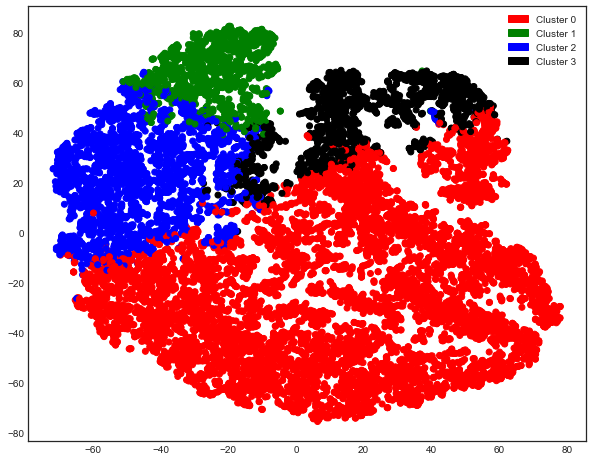

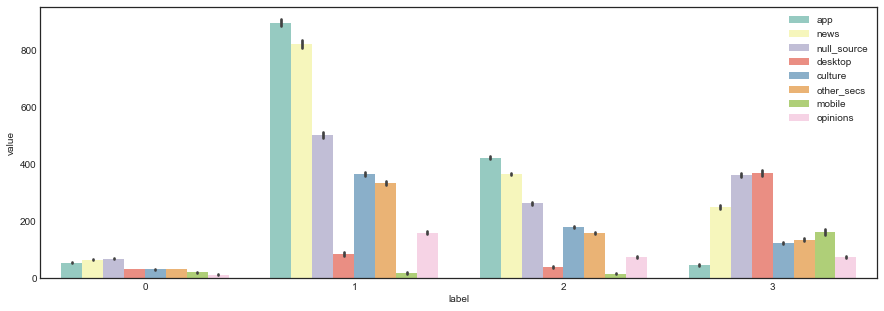

In [246]:
plot_clusters(kmeans.labels_)
plot_variance(df[kmeans_columns + ['label']])

In [260]:
from sklearn.ensemble import RandomForestClassifier
y = df.iloc[:,-1]
X = df[kmeans_columns]
clf = RandomForestClassifier(n_estimators=100).fit(X, y)
selected_columns = list(pd.DataFrame(np.array([clf.feature_importances_, X.columns]).T, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7)
           .Feature
           .values)

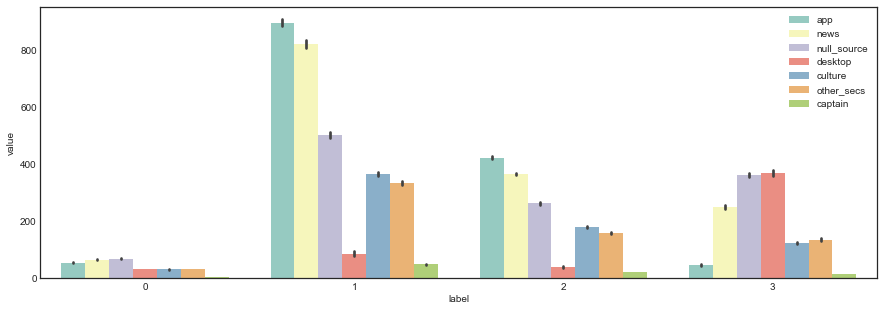

In [261]:
# Plot data
tidy = df[selected_columns+['label']].melt(id_vars='label')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='label', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
#plt.savefig('randomforest.jpg', dpi=300)